In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
# input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
111748
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [39]:
def predict_train(input_str, letters, max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}
    HW: dict[str, int] = {}
    W: dict[str, dict[str, dict[int, int]]] = {}

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)
    
    prev_index = 0

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_index] += 1
            continue
        
        IDX.append(prev_index)

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        key_HW = prev_inp + str(prev_index) + ':' + inp

        inp_min_index = 0
        if HW.get(key_HW, -1) != -1:
            inp_min_index = HW[key_HW]
        else:
            inp_min_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][inp_min_index] += 1

            HW.setdefault(key_HW, inp_min_index)

        key_I = prev_inp + str(prev_index)
        W.setdefault(key_I, {})
        W[key_I].setdefault(inp, {})
        W[key_I][inp].setdefault(inp_min_index, 0)
        W[key_I][inp][inp_min_index] += 1

        # recursion
        prev_index = inp_min_index
    
    return W, HW, IDX

max_index_L1 = 32*4

W, HW, IDX = predict_train(input_str, letters, max_index=max_index_L1)
for wk, wv in W.items():
    print(wk, wv)

c0 {'h': {0: 2}, 'k': {52: 4}, 't': {70: 1}, 'a': {26: 1}, 'e': {124: 1}}
h0 {'a': {0: 8}, 'e': {103: 12}, ' ': {53: 15}, 'i': {99: 6}, 'o': {74: 4}, 't': {9: 3}}
a0 {'p': {0: 1}, 'n': {7: 9}, 'd': {90: 10}, ' ': {75: 7}, 'r': {56: 3}, 'w': {0: 2}, 's': {23: 5}, 'i': {84: 4}, 'f': {91: 1}, 't': {125: 4}, 'b': {126: 1}, 'g': {116: 2}, 'l': {18: 3}, 'h': {62: 1}, 'y': {104: 1}, 'v': {77: 1}}
p0 {'t': {0: 1}, 'o': {125: 3}, 'e': {121: 2}, 'y': {22: 1}, 'p': {1: 2}, 'l': {5: 1}}
t0 {'e': {0: 5}, ' ': {127: 32}, 'r': {4: 2}, 'a': {75: 3}, "'": {94: 2}, 'h': {95: 2}, 'o': {114: 1}, 'i': {53: 1}}
e0 {'r': {0: 9}, "'": {10: 1}, 's': {4: 4}, 'h': {87: 1}, 'v': {27: 2}, 'g': {113: 1}, ' ': {127: 9}, 'l': {106: 4}, 'n': {44: 4}, 'd': {23: 1}, 'e': {1: 5}, 'y': {127: 1}, 'x': {62: 1}, 'c': {26: 1}, 'a': {68: 2}, 't': {119: 1}}
r0 {' ': {0: 9}, 's': {47: 2}, 'o': {17: 1}, 'e': {37: 9}, 'd': {82: 1}, 'y': {85: 2}, 'g': {6: 1}, 'i': {5: 1}, 'r': {119: 1}, 'a': {3: 2}, 'c': {46: 1}, 'm': {99: 1}}
 0 {

In [40]:
def predict(input_str: str, letters: list, W: dict[str, dict[str, dict[int, int]]], HW: dict[str, int], max_index=4):
    err = 0

    indices = [x for x in range(max_index)]

    for inp_idx, inp in enumerate(input_str[:-1]):
        key_I = inp + str(indices[0])
        O = W.get(key_I, {})

        for index in indices[1:]:
            # print(O)
            # print()
            key_I = inp + str(index)

            index_O = W.get(key_I, {})

            for key, val in index_O.items():
                O.setdefault(key, {})
                O[key].update(val)

        # print(O)
        # print()
        max_symbol = 'a'
        max_symbol_index = 0
        max_val = 0
        for key, val in O.items():
            max_index = max(val, key=val.get)
            O[key] = {max_index: val[max_index]}

            if val[max_index] > max_val:
                max_val = val[max_index]
                max_symbol_index = max_index
                max_symbol = key

        # print(O)
        next_inp = input_str[inp_idx + 1]
        print(max_symbol, next_inp, max_symbol_index, max_val)

        # err
        if max_symbol != next_inp:
            err += 1

            index_stats = O.get(next_inp, {0: 0})
            max_symbol_index = list(index_stats.keys())[0]

        # recurtion
        indices = [max_symbol_index]

    return err

err_L1 = predict(input_str, letters, W, HW, max_index=max_index_L1)

print(err_L1, err_L1 / (len(input_str) / 100))

h h 79 16
r a 63 14
i p 31 17
o t 125 3
  e 127 32
r r 0 9
    0 9
a i 107 20
n n 0 17
g   73 30
t w 77 22
h h 1 5
e i 106 22
t c 8 16
h h 2 5
    2 10
t w 1 30
h e 119 8
    3 23
t a 65 29
n r 25 19
e e 2 13
    4 40
t i 89 36
n n 1 25
  t 58 16
h r 104 20
i o 88 7
u d 73 11
  u 63 25
g c 35 8
e e 3 2
  d 114 33
    5 44
t t 2 37
h o 27 33
f   25 18
t w 40 29
  i 5 9
n n 2 22
g n 21 19
  i 68 8
n e 100 13
    7 20
t t 3 23
h h 3 30
e e 5 23
    8 55
t p 90 38
h o 56 7
o o 3 13
h h 4 18
    9 20
t a 46 24
n n 4 18
  d 69 18
    10 32
s s 0 20
o o 4 13
  m 8 27
e e 6 11
    11 24
a b 67 30
e e 7 4
  e 46 18
  s 34 19
    12 10
a a 3 32
n n 5 18
d d 3 13
    13 38
i t 113 26
h h 5 29
e e 9 50
    14 40
h s 21 23
  t 17 16
  o 12 23
u r 40 20
e i 86 20
n e 107 19
  s 35 36
    15 12
a b 98 19
i e 68 4
  g 37 21
l i 43 9
n n 6 13
d   75 53
t h 6 20
e e 12 20
  r 51 36
e e 13 12
    17 30
a i 41 31
n s 57 13
    18 26
a e 40 30
r d 46 20
  w 106 38
a a 4 4
n r 52 24
i d 90 8
    19 13
a b 7

In [41]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    TF.append(0)

    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

[16, 6, 16, 6, 8, 16, 12, 22, 14, 11, 19, 7, 6, 13, 5, 6, 23, 7, 14, 21, 14, 7, 11, 25, 9, 10, 11, 10, 14, 7, 11, 5, 13, 4, 23, 9, 16, 23, 7, 10, 14, 10, 11, 15, 23, 10, 8, 15, 23, 8, 14, 16, 6, 21, 13, 9, 8, 22, 10, 11, 6, 16, 24, 5, 13, 14, 9, 22, 15, 11, 6, 22, 7, 8, 17, 23, 10, 9, 9, 8, 13, 12, 8, 24, 6, 13, 7, 11, 10, 25, 5, 13, 8, 16, 23, 14, 7, 23, 17, 7, 6, 14, 5, 8, 24, 7, 14, 11, 13, 23, 6, 16, 8, 10, 9, 6, 22, 7, 15, 8, 10, 8, 9, 13, 10, 10, 11, 21, 9, 16, 5, 22, 5, 10, 6, 4, 23, 5, 12, 5, 4, 20, 6, 7, 8, 8, 25, 17, 8, 21, 11, 7, 13, 25, 7, 14, 6, 4, 23, 13, 5, 24, 8, 13, 11, 20, 9, 12, 11, 6, 23, 5, 13, 4, 10, 11, 5, 22, 4, 6, 10, 8, 8, 11, 12, 6, 8, 14, 10, 23, 8, 16, 2, 11, 10, 25, 13, 11, 22, 12, 10, 20, 13, 8, 22, 7, 15, 10, 23, 14, 12, 23, 7, 13, 23, 3, 10, 12, 10, 9, 23, 11, 6, 14, 23, 13, 12, 11, 3, 21, 5, 13, 2, 21, 16, 7, 21, 6, 10, 7, 7, 13, 6, 22, 9, 9, 7, 8, 8, 10, 12, 14, 10, 4, 25, 8, 5, 7, 20, 11, 11, 6, 11, 11, 11, 7, 15, 13, 23, 7, 13, 23, 8, 12, 12, 11, 12

In [42]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

1334
mean_WS=39.64767616191904
e 4041
 h 1869
 th 1712
o 1656
 w 1406
t 1309
 s 1060
 p 981
 t 948
 and 927
er 919
 b 853
h 826
l 802
s 774
i 710
 c 610
 a 608
 r 606
ou 600
 i 598
ed 596
 f 565
 d 564
r 563
 l 524
n 520
at 516
 it 500
 y 476
 m 475
ing 439
 of 419
en 398
as 398
 g 387
aid 370
or 364
is 355
 n 344
a 333
 wh 323
ng 307
et 301
ow 298
u 278
id 276
ig 267
oh 265
om 263
es 263
ad 241
ay 233
im 217
ey 212
it 210
 on 195
 k 186
 in 185
ot 184
 as 180
ob 172
on 164
 j 160
 v 151
 is 144
 at 141
ooh 140
ery 139
ar 138
nd 134
n' 132
ly 130
 sh 127
av 122
in 118
op 116
p 115
el 114
 if 113
an 109
em 106
ould 104
ang 104
al 103
oug 102
ith 100
ic 99
st 99
 up 98
 ab 97
 al 96
ok 95
all 93
am 92
oph 90
ec 87
ent 87
ai 83
th 81
 all 80
 ex 76
ell 76
ear 76
ol 76
il 76
ld 75
ap 74
 u 74
 ow 74
ik 73
 tr 73
eth 73
 e 73
 ch 71
ong 71
ef 71
b 71
elf 70
 an 69
 ag 68
 sa 67
 it' 67
 q 66
ak 66
abb 66
 any 65
oo 65
 oh 65
 eey 63
 st 62
os 61
f 61
d 59
ack 59
 bu 58
 my 58
ut 57
 ' 56
ab

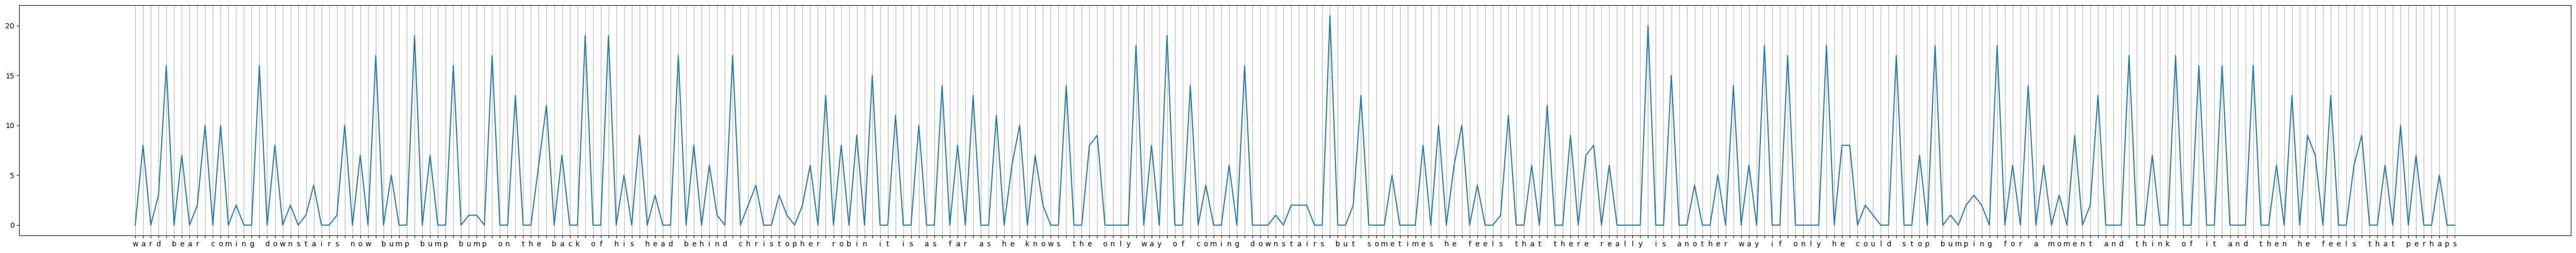

In [43]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()

In [44]:
from collections import Counter


def predict(input_str, TF: list, StatsDict: dict, index_by_prev: dict, max_index, err=0,):
    indexes = [x for x in range(1, max_index+1)]

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            continue

        all_indexes_prd_symbols = Counter({})
        prd_symbols_per_index = []

        for index in indexes:
            stats_key = inp + str(index)
            prd_symbols = StatsDict.get(stats_key)

            if not prd_symbols:
                print(f'not prd_symbol: {inp=} {index=} {prd_symbols=}')
                continue

            print(f'{inp=} {index=} {prd_symbols=}')
            all_indexes_prd_symbols += Counter(prd_symbols)
            prd_symbols_per_index.append(prd_symbols)

        print(f'{all_indexes_prd_symbols=}')
        stl = np.array(list(all_indexes_prd_symbols.values()))
        # tf = len(list(all_indexes_prd_symbols.keys()))
        tf = np.sum(np.abs(stl - stl[np.newaxis].T))

        TF.append(tf)

        prd_symbol = max(all_indexes_prd_symbols, key=all_indexes_prd_symbols.get)
        prd_symbol_stats = all_indexes_prd_symbols[prd_symbol]

        next_inp = input_str[inp_idx + 1]
        print(f'{inp_idx=} {inp=} | {prd_symbol=} {next_inp=} {prd_symbol_stats=}')

        if prd_symbol != next_inp:
            err += 1

        output.append(prd_symbol)

        prev_indexes = []
        for idx, prd_symbols in enumerate(prd_symbols_per_index):
            if prd_symbols.__contains__(next_inp):
                prev_indexes.append(idx + 1)

        print(f'{prev_indexes=}')

        # recurtion
        indexes = []
        for prev_index in prev_indexes:
            by_prev_key = inp + str(prev_index) + ':' + next_inp
            next_index = index_by_prev.get(by_prev_key)

            if not next_index:
                continue
            
            print(f'{next_index}')
            indexes.extend(list(next_index.keys()))

        indexes = list(set(indexes))
        print('next indexes', indexes)
        
        if len(indexes) <= 0:
            indexes = [x for x in range(1, max_index+1)]

        print()
        
    output.insert(0, input_str[0])

    return TF, err, output


In [45]:
# predict
TF = []

TF, err, out_L1 = predict(input_str=input_str, TF=TF, StatsDict=StatsDict, index_by_prev=index_by_prev_L1, max_index=max_index_L1)

print(err, err / (len(input_str) / 100) )

NameError: name 'StatsDict' is not defined